# https://machinelearningmastery.com/neural-network-for-cancer-survival-dataset/

C:\Users\bokan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy: 0.745


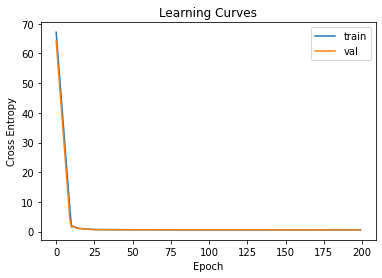

In [1]:
# fit a simple mlp model on the haberman and review learning curves
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))
# predict test set
yhat = model.predict_classes(X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [2]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 0.5901 - accuracy: 0.7124 - val_loss: 0.5666 - val_accuracy: 0.7582
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.7516 - val_loss: 0.5669 - val_accuracy: 0.7647
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5782 - accuracy: 0.7320 - val_loss: 0.5839 - val_accuracy: 0.7451
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5654 - accuracy: 0.7451 - val_loss: 0.5613 - val_accuracy: 0.7582
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.7451 - val_loss: 0.5657 - val_accuracy: 0.7516
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7386 - val_loss: 0.5901 - val_accuracy: 0.7255
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.7582 - val_loss: 0.5500 - val_accuracy: 0.7451
Epoch 8/100


Epoch 59/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5685 - accuracy: 0.7255 - val_loss: 0.5484 - val_accuracy: 0.7451
Epoch 60/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5501 - accuracy: 0.7451 - val_loss: 0.5681 - val_accuracy: 0.7647
Epoch 61/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5433 - accuracy: 0.7582 - val_loss: 0.5624 - val_accuracy: 0.7451
Epoch 62/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5880 - accuracy: 0.7516 - val_loss: 0.6636 - val_accuracy: 0.6928
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.7516 - val_loss: 0.6092 - val_accuracy: 0.7451
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5829 - accuracy: 0.7582 - val_loss: 0.5644 - val_accuracy: 0.7712
Epoch 65/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7451 - val_loss: 0.5688 - val_accuracy: 0.7712
Epoch 

In [10]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7516
Testing Accuracy:  0.7647


In [8]:
import matplotlib.pyplot as plt
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

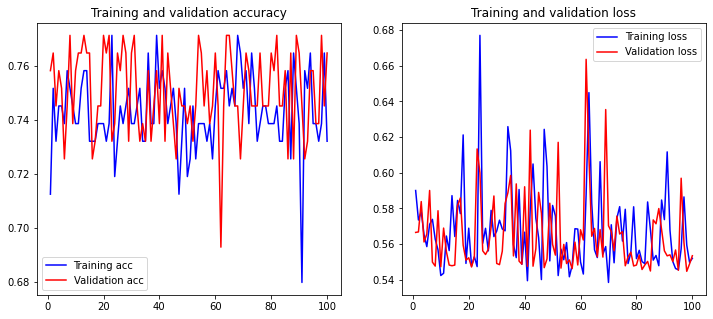

In [9]:
plot_history(history)